<a href="https://colab.research.google.com/github/Jazminr25/Loan-Eligibility/blob/main/Loan_Eligibility_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries needed for the project.

In [19]:
# for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

# ML libraries
from sklearn.linear_model import LogisticRegression


# warnings
import warnings
warnings.filterwarnings('ignore')

# **Load Data from Dataset**



In [20]:
# Get dataset and load it

df = pd.read_csv('/content/train.csv')
df.head() #this lets use view the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Understanding the Dataset.
Loan_ID              Unique Loan Id
Gender               Gender (male, female)
Married              Married (yes,no)
Dependents           # of Dependents
Education            Graduated/ Not Graduate
Self_Employed        Self employeeed (yes, no)
ApplicantIncome      Applicant Income
CoapplicantIncome    Coapplicant Income
LoanAmount           Loan Amount in thousands
Loan_Amount_Term     Months of Loan
Credit_History       Credit History Meets Guidelines (yes,no)
Property_Area         Urban, Semi, and Rural
Loan_Status           Loan Approved (Y,N)

Size of dataset (number of rows, number of columns)
Check for null values

In [21]:
df.shape

(614, 13)

In [22]:

df.isnull().sum() # checks for null values

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# **Data Cleaning and Preparation**
The data with null values can be dropped, but we will replace with some values.

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [23]:
# Loan Id is not needed so it will be dropped
df.drop('Loan_ID', axis=1, inplace=True)

In [24]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [25]:
null_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in null_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
# check for null values
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [27]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

# **Exploritory Data Analysis (EDA)**

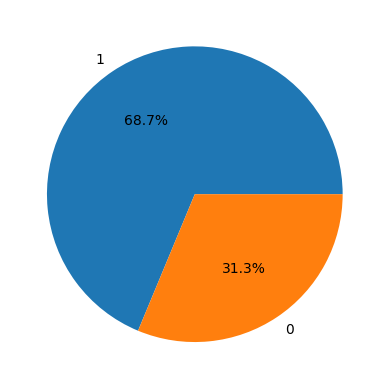

In [28]:
# split the ojects (catergorical data) and numerical data
#num= df.select_dtypes(include='number').columns.tolist()
#cat= df.select_dtypes(include='object').columns.tolist()

#shows that the data is imbalanced (there are more loans that are accepted than denied)
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

**Catergorical Data**

<Axes: xlabel='Education', ylabel='count'>

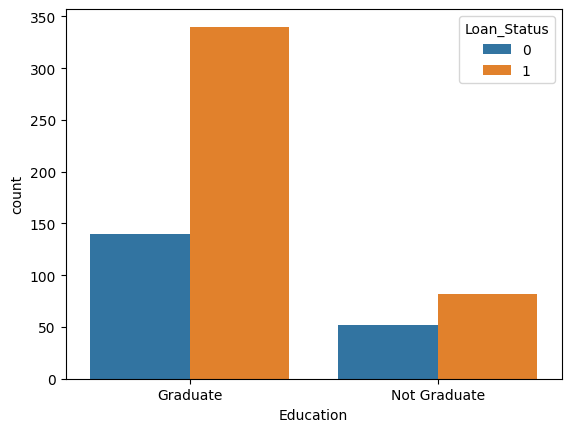

In [29]:
# Graph Catergorical Data
# Education and Loan Status Graph
sb.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

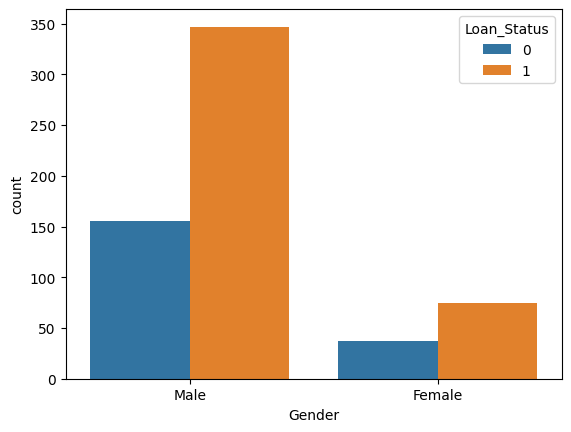

In [30]:
# Gender and Loan Status
sb.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

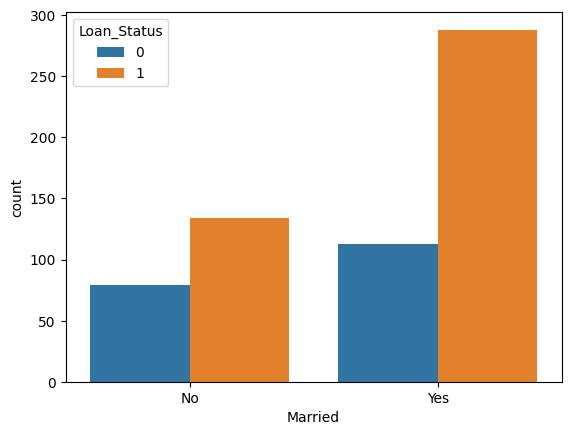

In [31]:
# Married and Loan Status
sb.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

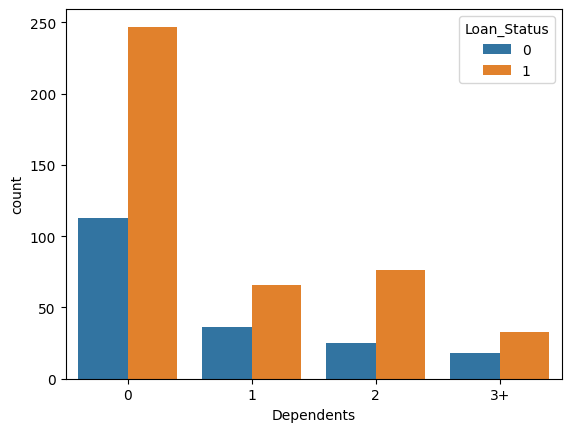

In [32]:
# Dependents and Loan Status
sb.countplot(x='Dependents',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

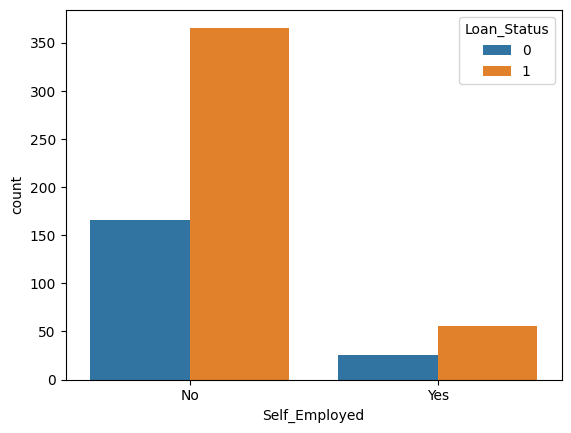

In [33]:
# Self Employeed and Loan Status
sb.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

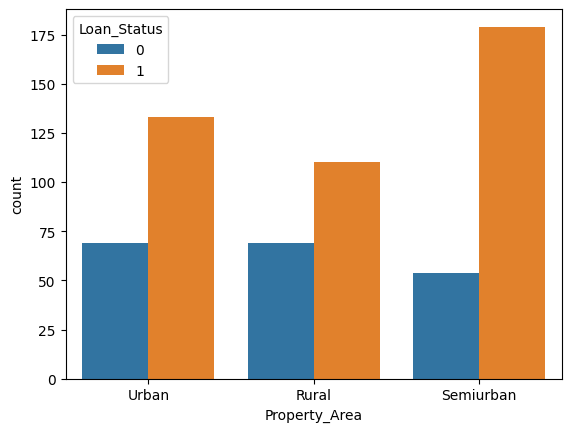

In [34]:
# Property Area and Loan Status
sb.countplot(x='Property_Area',hue='Loan_Status',data=df)

**Graph Numerical Data**

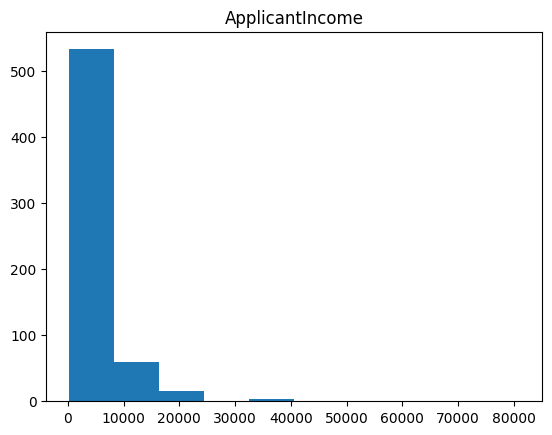

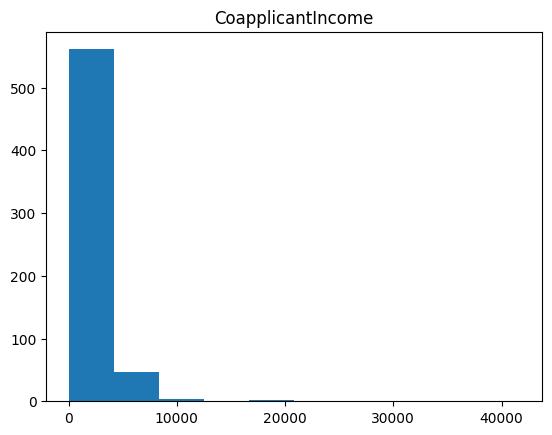

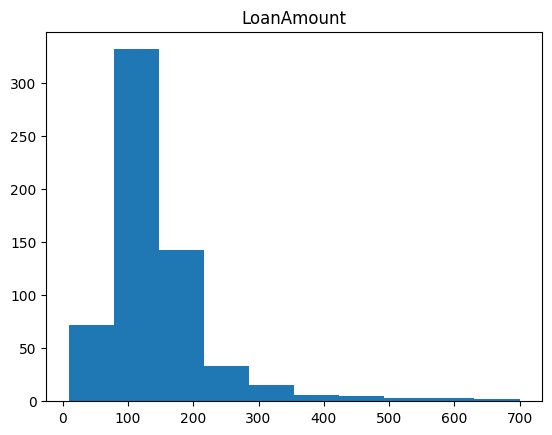

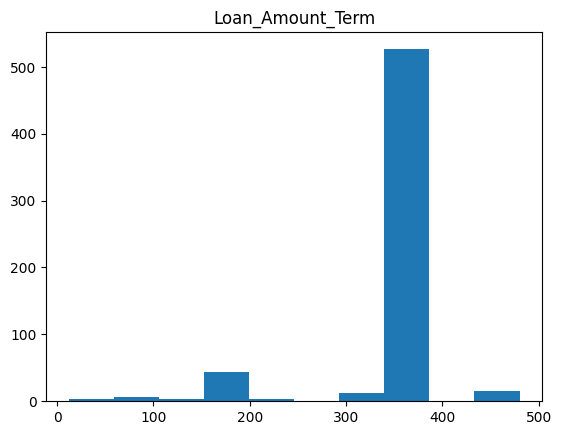

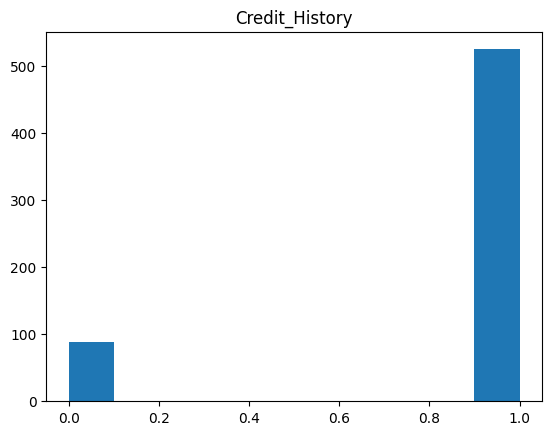

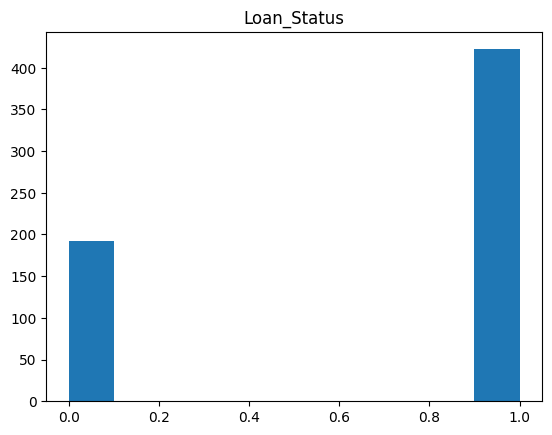

In [35]:
# graphing numerical data
num= df.select_dtypes(include='number').columns.tolist()
num_loan = df[num]
for i in num_loan:
  plt.hist(num_loan[i])
  plt.title(i)
  plt.show()

Encoding Data to numeric values

In [36]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

# Convert 'Dependents' column to numerical, handling '3+'
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# See Dataset
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


Divide the dataset into two variables

In [39]:
x = df.drop(['Loan_Status'], axis=1)  # Drop 'Loan_ID' here
y = df['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)


# **Logistic Regression Model**

In [40]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

# prediction summary
print(metrics.classification_report(y_test,y_pred))

#accuracy score
Lr_score = metrics.accuracy_score(y_pred,y_test)
print('accuracy is',metrics.accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.84      0.96      0.89        48

    accuracy                           0.82        62
   macro avg       0.78      0.66      0.68        62
weighted avg       0.81      0.82      0.80        62

accuracy is 0.8225806451612904


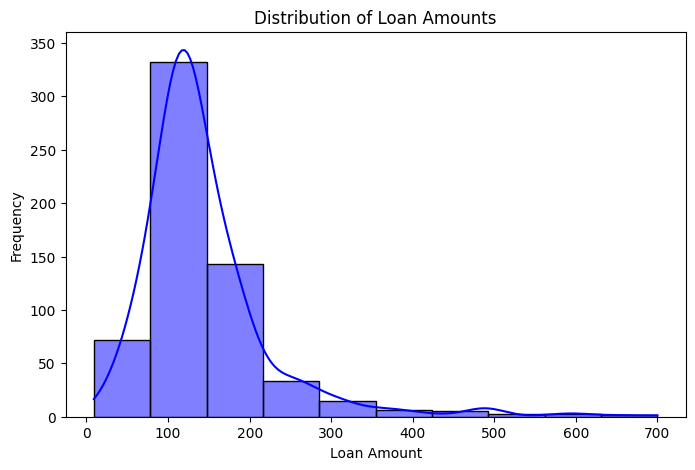

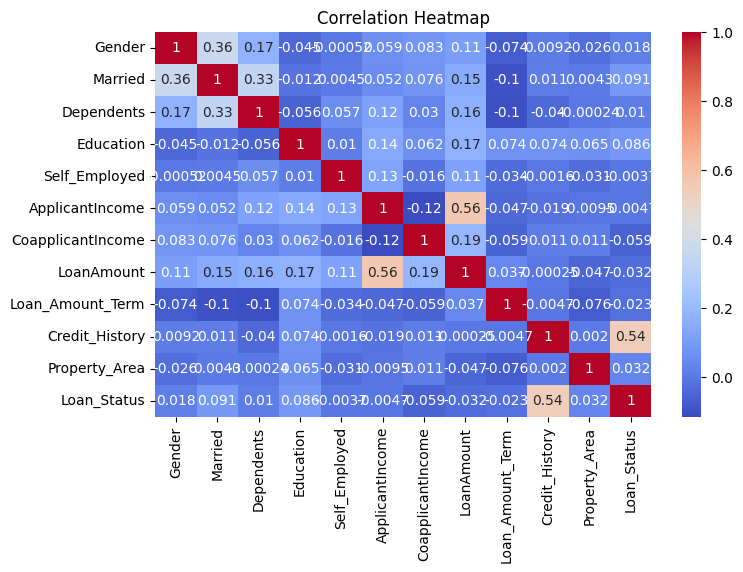

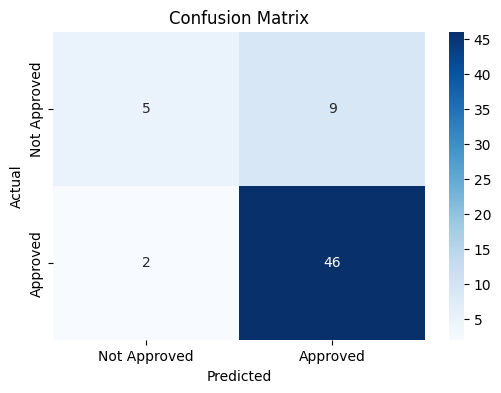

In [42]:
# Visualization 1: Distribution of Loan Amounts
plt.figure(figsize=(8, 5))
sb.histplot(df['LoanAmount'], kde=True, color='blue', bins=10)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(8, 5))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualization 3: Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Approved", "Approved"],
            yticklabels=["Not Approved", "Approved"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Loan Eligibility using Logistic Regression**

In [43]:
# Change the inputs to predict if the loan will be accepted
# 0 means rejected, 1 means approved
# Function to predict loan approval based on user input
print("Enter the following details to check loan eligibility:") # Removed extra indentation
gender = int(input("Gender (Male=1, Female=0): "))
married = int(input("Married (Yes=1, No=0): "))
dependents = int(input("Dependents: "))
education = int(input("Education (Graduate=1, Not Graduate=0): "))
self_employed = int(input("Self Employed (Yes=1, No=0): "))
applicant_income = float(input("Applicant Income: "))
coapplicant_income = float(input("Coapplicant Income: "))
loan_amount = float(input("Loan Amount in thousands: "))
loan_amount_term = float(input("Loan Amount Term in Months: "))
credit_history = float(input("Credit History (0=No, 1=Yes): "))
property_area = int(input("Property Area (Rural=0, Semiurban=1, Urban=2): "))

import pandas as pd # Import pandas here

# Create a DataFrame for the input data
user_data = pd.DataFrame({  # Now pd is defined
    'Gender': [gender],
    'Married': [married],
    'Dependents': [dependents],
    'Education': [education],
    'Self_Employed': [self_employed],
    'ApplicantIncome': [applicant_income],
    'CoapplicantIncome': [coapplicant_income],
    'LoanAmount': [loan_amount],
    'Loan_Amount_Term': [loan_amount_term],
    'Credit_History': [credit_history],
    'Property_Area': [property_area]
})



# Make prediction
prediction = lr.predict(user_data)

# Output result
if prediction[0] == 1:
    print("Loan Approved ✅")
else:
    print("Loan Not Approved ❌")

Enter the following details to check loan eligibility:
Gender (Male=1, Female=0): 0
Married (Yes=1, No=0): 0
Dependents: 0
Education (Graduate=1, Not Graduate=0): 1
Self Employed (Yes=1, No=0): 0
Applicant Income: 6000
Coapplicant Income: 100
Loan Amount in thousands: 100
Loan Amount Term in Months: 360
Credit History (0=No, 1=Yes): 1
Property Area (Rural=0, Semiurban=1, Urban=2): 2
Loan Approved ✅
